# Infant eating and sleeping patterns

I have a friend who uses an app to keep track of her infant's eating and sleeping schedule.  Because she is breastfeeding, the baby's eating habits can be unpredictable, but in principle, keeping track of the data could help identify patterns of behavior (haha, as if babies could be predicted!)

I have the exported data from the app as a CSV of timestamped periods of eating and sleeping, including whether the baby nursed on the left/right side or ate from a bottle, if so, how many oz of milk were used.  I'm hoping to use this data to answer questions of interest like:
* Does the baby tends to nap longer immediately following a feeding?
* Do the number of naps or cumulative napping time have an impact on the number/frequency of nighttime wakings?
* Has the baby shown changes in patterns of feedings/sleeping as time progresses?
* Does the baby tend to nurse on both sides more often (thus consuming more milk at a time) as the months have passed?

In [283]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [284]:
%matplotlib inline

In [285]:
df = pd.read_csv('NursingData_clean.csv')

Using the cleaned and converted data, I can now investigate it for patterns such as:
* L/R counts bar graph for time of day (sleep, afternoon, evening)
* mean daily feeding per week
* Stacked bar for L/R/bottle counts per month
* Stacked bar for hrs slept, night + nap(s) per month
* Time sleeping in one day vs time eating in one day (correlated?)
* Do naps that immediately follow nursing last longer than ones that don\'t? (Time since last nurse vs. length of nap)
* Frequency of bottle feedings per month (have bottle feedings become more rare with age?)
* make keys of month (0,1,2...) and week to .groupby() and perform summary stats on 

In [286]:
df.columns.values

array(['Unnamed: 0', 'time', 'Year', 'Month', 'TimeofDay', 'LeftFeed',
       'RightFeed', 'BotFeed', 'TotalFeed', 'BotAmt', 'Sleep'], dtype=object)

In [287]:
df[:8]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.30,0,1.30,NaN,NaN
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.00,0,7.52,NaN,NaN
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.00,0,14.50,NaN,NaN
3,3,2015-06-21 05:23:55,2015,6,Late night,0.00,20.00,0,20.00,NaN,NaN
4,4,2015-06-21 05:47:59,2015,6,Late night,22.18,0.00,0,22.18,NaN,NaN
5,5,2015-06-21 06:24:35,2015,6,Late night,0.00,15.83,0,15.83,NaN,NaN
6,6,2015-06-21 07:50:08,2015,6,Morning,13.62,0.00,0,13.62,NaN,NaN
7,7,2015-06-21 08:44:12,2015,6,Morning,0.00,9.67,0,9.67,NaN,NaN


In [288]:
df['time'] = pd.to_datetime(df['time'])

In [289]:
ordered = df.sort_values('time')

In [290]:
ordered[:8]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
3234,3234,2015-05-31 00:48:35,2015,5,Late night,NaN,NaN,0,NaN,NaN,NaN
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
3235,3235,2015-06-21 01:17:27,2015,6,Late night,NaN,NaN,0,NaN,NaN,NaN
2560,2560,2015-06-21 01:19:50,2015,6,Late night,NaN,NaN,0,NaN,NaN,1.12
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN
2561,2561,2015-06-21 02:08:15,2015,6,Late night,NaN,NaN,0,NaN,NaN,1.15
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN
2562,2562,2015-06-21 02:52:03,2015,6,Late night,NaN,NaN,0,NaN,NaN,2.00


In [291]:
monthly = df.groupby([df['Year'],df['Month']])

In [292]:
monthly.mean()

Unnamed: 0  LeftFeed  RightFeed   BotFeed  TotalFeed    BotAmt  \
Year Month                                                                    
2015 5      3234.000000       NaN        NaN  0.000000        NaN       NaN   
     6       592.144385  9.364038   8.519808  0.000000  17.883846       NaN   
     7       382.960465  8.602150   8.753621  0.011628  17.367523  1.500000   
     8       984.218391  8.403558   8.602442  0.091954  17.109896  3.300000   
     9      1574.625551  8.320031   8.993611  0.132159  17.498827  2.708333   
     10     1855.357143  7.781006   8.095503  0.178571  16.127929  3.264706   
     11     2109.849462  7.980206   6.771858  0.139785  14.943776  2.615385   
     12     2397.784648  7.895947   6.850296  0.213220  15.042041  3.125000   
2016 1      2641.620000  8.173333   7.376190  0.042857  15.609127  3.250000   

               Sleep  
Year Month            
2015 5           NaN  
     6      1.423333  
     7           NaN  
     8      1.904800  
     9      1.911860  
     10     3.285401  
     11     3.249524  
     12     3.394122  
2016 1      3.876122

In [293]:
monthly.describe()

BotAmt     BotFeed    LeftFeed   RightFeed       Sleep  \
Year Month                                                                    
2015 5     count   0.000000    1.000000    0.000000    0.000000    0.000000   
           mean         NaN    0.000000         NaN         NaN         NaN   
           std          NaN         NaN         NaN         NaN         NaN   
           min          NaN    0.000000         NaN         NaN         NaN   
           25%          NaN    0.000000         NaN         NaN         NaN   
           50%          NaN    0.000000         NaN         NaN         NaN   
           75%          NaN    0.000000         NaN         NaN         NaN   
           max          NaN    0.000000         NaN         NaN         NaN   
     6     count   0.000000  187.000000  156.000000  156.000000    3.000000   
           mean         NaN    0.000000    9.364038    8.519808    1.423333   
           std          NaN    0.000000    9.973710    9.980969    0.499633   
           min          NaN    0.000000    0.000000    0.000000    1.120000   
           25%          NaN    0.000000    0.000000    0.000000    1.135000   
           50%          NaN    0.000000    9.415000    4.150000    1.150000   
           75%          NaN    0.000000   16.172500   15.000000    1.575000   
           max          NaN    0.000000   40.920000   39.300000    2.000000   
     7     count   1.000000  430.000000  428.000000  428.000000    0.000000   
           mean    1.500000    0.011628    8.602150    8.753621         NaN   
           std          NaN    0.241121    9.180430    9.398947         NaN   
           min     1.500000    0.000000    0.000000    0.000000         NaN   
           25%     1.500000    0.000000    0.000000    0.000000         NaN   
           50%     1.500000    0.000000    8.210000    8.470000         NaN   
           75%     1.500000    0.000000   15.000000   15.000000         NaN   
           max     1.500000    5.000000   43.950000   44.670000         NaN   
     8     count  10.000000  435.000000  385.000000  385.000000   50.000000   
           mean    3.300000    0.091954    8.403558    8.602442    1.904800   
           std     1.437591    0.672573    8.884587    9.342929    1.113236   
           min     1.500000    0.000000    0.000000    0.000000    0.170000   
           25%     2.125000    0.000000    0.000000    0.000000    1.055000   
           50%     3.000000    0.000000    8.370000    8.370000    1.655000   
...                     ...         ...         ...         ...         ...   
     10    std     1.213436    0.928861    8.058181    8.604257    3.830923   
           min     1.000000    0.000000    0.000000    0.000000    0.250000   
           25%     2.500000    0.000000    0.000000    0.000000    1.120000   
           50%     3.000000    0.000000    8.000000    7.585000    1.530000   
           75%     4.000000    0.000000   15.000000   15.000000    2.730000   
           max     6.000000    5.000000   40.170000   42.850000   13.550000   
     11    count  13.000000  465.000000  339.000000  339.000000  126.000000   
           mean    2.615385    0.139785    7.980206    6.771858    3.249524   
           std     0.820413    0.825136    8.731438    8.076575    3.858532   
           min     0.500000    0.000000    0.000000    0.000000    0.170000   
           25%     2.000000    0.000000    0.000000    0.000000    0.942500   
           50%     3.000000    0.000000    7.330000    5.000000    1.515000   
           75%     3.000000    0.000000   15.000000   13.150000    2.642500   
           max     3.500000    5.000000   42.170000   38.530000   13.520000   
     12    count  20.000000  469.000000  338.000000  338.000000  131.000000   
           mean    3.125000    0.213220    7.895947    6.850296    3.394122   
           std     1.394302    1.011344    8.532743    7.553696    3.929287   
           min     1.000000    0.000000    0.000000    0.000000    0.17

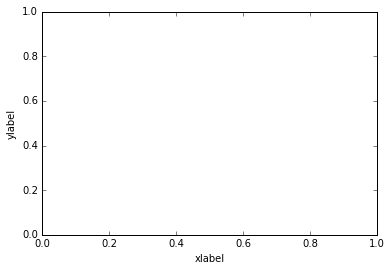

In [299]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.set_ylabel('ylabel')
ax.set_xlabel('xlabel')

In [158]:
rm15 = df[df['Total Feed'] != 15.]

In [159]:
monthly_rm15 = rm15.groupby([df['Year'],df['Month']])

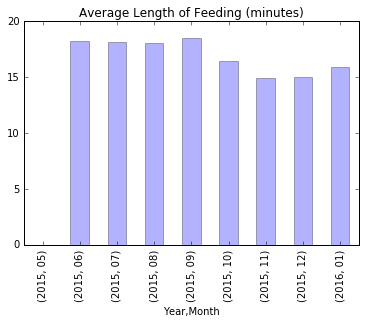

In [160]:
monthly_rm15['Total Feed'].mean().plot(kind='bar',color='b',alpha=0.3)
plt.title('Average Length of Feeding (minutes)')

In [161]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,leftfeed,rightfeed,Month,Year,Time of Day
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,0.000000,1.300000,06,2015,Late night
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,7.516667,0.000000,06,2015,Late night
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,14.500000,0.000000,06,2015,Late night
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000,06,2015,Late night
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,22.183333,0.000000,06,2015,Late night
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,0.000000,15.833333,06,2015,Late night
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,13.616667,0.000000,06,2015,Morning
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,0.000000,9.666667,06,2015,Morning


In [162]:
daytime = df.groupby("Time of Day")

In [163]:
data = pd.Series(df['Time of Day'])#, index = ['Morning','Afternoon','Evening','Late Night'])

In [164]:
data[:8]

0    Late night
1    Late night
2    Late night
3    Late night
4    Late night
5    Late night
6       Morning
7       Morning
Name: Time of Day, dtype: object

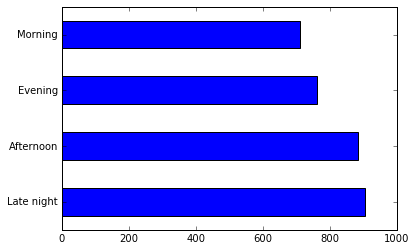

In [165]:
data.value_counts().plot(kind='barh')

In [166]:
timelen = pd.cut(df['Total Feed'], 5)

In [167]:
timelen[:5]

0    (-0.06, 12]
1    (-0.06, 12]
2       (12, 24]
3       (12, 24]
4       (12, 24]
Name: Total Feed, dtype: category
Categories (5, object): [(-0.06, 12] < (12, 24] < (24, 36] < (36, 48] < (48, 60]]

In [168]:
feedtime = pd.crosstab(df['Time of Day'],timelen)

In [169]:
feedtime

Total Feed,"(-0.06, 12]","(12, 24]","(24, 36]","(36, 48]","(48, 60]"
Time of Day,,,,,
Afternoon,177,375,54,7,0
Evening,137,327,73,16,1
Late night,153,448,90,36,6
Morning,179,422,47,11,1


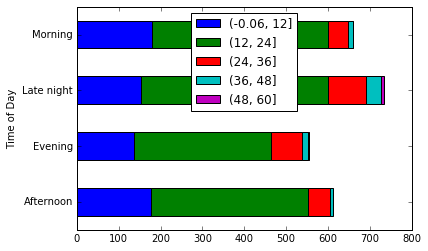

In [170]:
feedtime.plot(kind='barh', stacked = True)
plt.legend(loc='best')

In [231]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,leftfeed,rightfeed,Month,Year,Time of Day
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,0.000000,1.300000,06,2015,Late night
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,7.516667,0.000000,06,2015,Late night
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,14.500000,0.000000,06,2015,Late night
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,0.000000,20.000000,06,2015,Late night
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,22.183333,0.000000,06,2015,Late night
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,0.000000,15.833333,06,2015,Late night
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,13.616667,0.000000,06,2015,Morning
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,0.000000,9.666667,06,2015,Morning


In [172]:
feeddf = pd.DataFrame({'time':df.time,'leftfeed':df.leftfeed,
                       'rightfeed':df.rightfeed, 'botfeed': bottime,
                       'totfeed':df['Total Feed'], 'month':df.Month,
                       'ToD':df['Time of Day'], 'year':df.Year})

In [173]:
feeddf = pd.DataFrame(df, columns=['time','Year','Month','Time of Day','leftfeed','rightfeed','Total Feed'])

In [174]:
feeddf[1010:1020]

,time,Year,Month,Time of Day,leftfeed,rightfeed,Total Feed
1010,2015-09-04 03:43:00,2015,09,Late night,0.000000,0.000000,5.000000
1011,2015-09-04 05:03:57,2015,09,Late night,15.900000,0.000000,15.900000
1012,2015-09-04 08:07:27,2015,09,Morning,0.000000,15.000000,15.000000
1013,2015-09-04 10:41:19,2015,09,Morning,15.000000,0.000000,15.000000
1014,2015-09-04 13:29:20,2015,09,Afternoon,20.666667,0.000000,20.666667
1015,2015-09-04 15:51:01,2015,09,Afternoon,0.000000,15.000000,15.000000
1016,2015-09-04 17:34:39,2015,09,Afternoon,15.000000,0.000000,15.000000
1017,2015-09-04 19:16:23,2015,09,Evening,0.000000,15.416667,15.416667
1018,2015-09-04 21:04:53,2015,09,Evening,14.500000,0.000000,14.500000
1019,2015-09-05 00:28:08,2015,09,Late night,0.000000,15.000000,15.000000


In [175]:
feeddf.insert(6,'botfeed',bottime)

In [176]:
ordered = feeddf.sort_values('time')

In [177]:
ordered[1010:1020]

,time,Year,Month,Time of Day,leftfeed,rightfeed,botfeed,Total Feed
927,2015-08-28 16:02:55,2015,08,Afternoon,0.000000,27.316667,0,27.316667
928,2015-08-28 18:05:22,2015,08,Afternoon,12.366667,0.000000,0,12.366667
929,2015-08-28 19:59:41,2015,08,Evening,0.000000,14.400000,0,14.400000
930,2015-08-28 21:27:10,2015,08,Evening,15.000000,0.000000,0,15.000000
931,2015-08-28 22:15:00,2015,08,Evening,0.000000,15.000000,0,15.000000
932,2015-08-29 02:11:07,2015,08,Late night,18.450000,0.000000,0,18.450000
933,2015-08-29 04:09:03,2015,08,Late night,0.000000,15.000000,0,15.000000
934,2015-08-29 07:40:51,2015,08,Morning,15.000000,0.000000,0,15.000000
935,2015-08-29 09:19:23,2015,08,Morning,15.000000,0.000000,0,15.000000
936,2015-08-29 11:13:34,2015,08,Morning,0.000000,14.500000,0,14.500000


In [178]:
del feeddf['botfeed']

In [179]:
df.solid.value_counts()

 O    20
 -    13
       3
Name: solid, dtype: int64

In [223]:
df['Bottle Amount'][2000:2012]

2000          
2001          
2002          
2003          
2004          
2005          
2006          
2007          
2008          
2009     4.5oz
2010       2oz
2011     1.5oz
Name: Bottle Amount, dtype: object

In [221]:
botamt = []
for amt in df['Bottle Amount']:
    if 'oz' not in amt:
        newamt = float('NaN')
    else:
        newamt = amt.strip().replace('oz','')
    botamt.append(newamt)

In [227]:
df['Sleep time'][3000].split(':')

['0', '24', '1']

In [229]:
df['Sleep time'][3000:3020]

3000      0:24:1
3001     1:33:18
3002      10:0:0
3003     0:34:21
3004     0:34:11
3005    11:29:25
3006      0:40:4
3007      1:30:0
3008     1:23:37
3009      9:35:5
3010     0:27:43
3011     0:26:47
3012    10:26:35
3013      1:50:0
3014      0:30:0
3015      0:36:0
3016     10:20:0
3017      1:47:3
3018       3:9:0
3019      0:25:0
Name: Sleep time, dtype: object

In [273]:
hms = df['Sleep time']

In [278]:
    hrlist = []
    for value in hms:
        if str(value) == 'nan':
            hours = float(value)
        elif str(value) ==' ':
            hours = float('Nan')
        else:
            valspl = str(value).split(':')
            if int(valspl[2]) < 10:
                valspl[2] = valspl[2] + '0'
            hours = float(valspl[0]) + float(valspl[1])/60. + float(valspl[2])/60.
        hrlist.append(hours)
    hrarr = np.array(hrlist)


['0', '39', '28']
['0', '29', '40']
['1', '30', '3']
['0', '47', '3']
['1', '38', '32']
['2', '31', '0']
['2', '30', '0']
['2', '45', '0']
['2', '11', '27']
['1', '44', '0']
['1', '38', '25']
['1', '8', '3']
['2', '44', '36']
['1', '23', '37']
['0', '10', '35']
['1', '44', '48']
['0', '48', '0']
['1', '0', '36']
['0', '30', '0']
['0', '59', '0']
['0', '30', '56']
['3', '15', '0']
['3', '0', '0']
['2', '0', '0']
['0', '26', '32']
['0', '42', '54']
['0', '48', '20']
['0', '19', '14']
['0', '43', '29']
['0', '18', '31']
['2', '19', '23']
['2', '19', '25']
['3', '44', '7']
['1', '16', '25']
['1', '0', '5']
['3', '4', '9']
['0', '26', '43']
['1', '0', '0']
['3', '0', '0']
['3', '0', '0']
['5', '0', '0']
['0', '39', '45']
['1', '44', '46']
['0', '39', '39']
['1', '52', '37']
['0', '22', '0']
['0', '0', '1']
['0', '59', '10']
['0', '41', '21']
['0', '28', '19']
['2', '4', '33']
['0', '15', '56']
['1', '0', '0']
['0', '55', '16']
['0', '39', '8']
['0', '7', '0']
['0', '8', '5']
['1', '49', '18

In [276]:
hms[2557]

' '

In [272]:
str(hms[2510]) == 'nan'

True

In [260]:
if hms[0] == float('NaN'):
    print('yay')